In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data is in .xlsx format. It consists of multiple sheets. Multiple Tables in each sheet

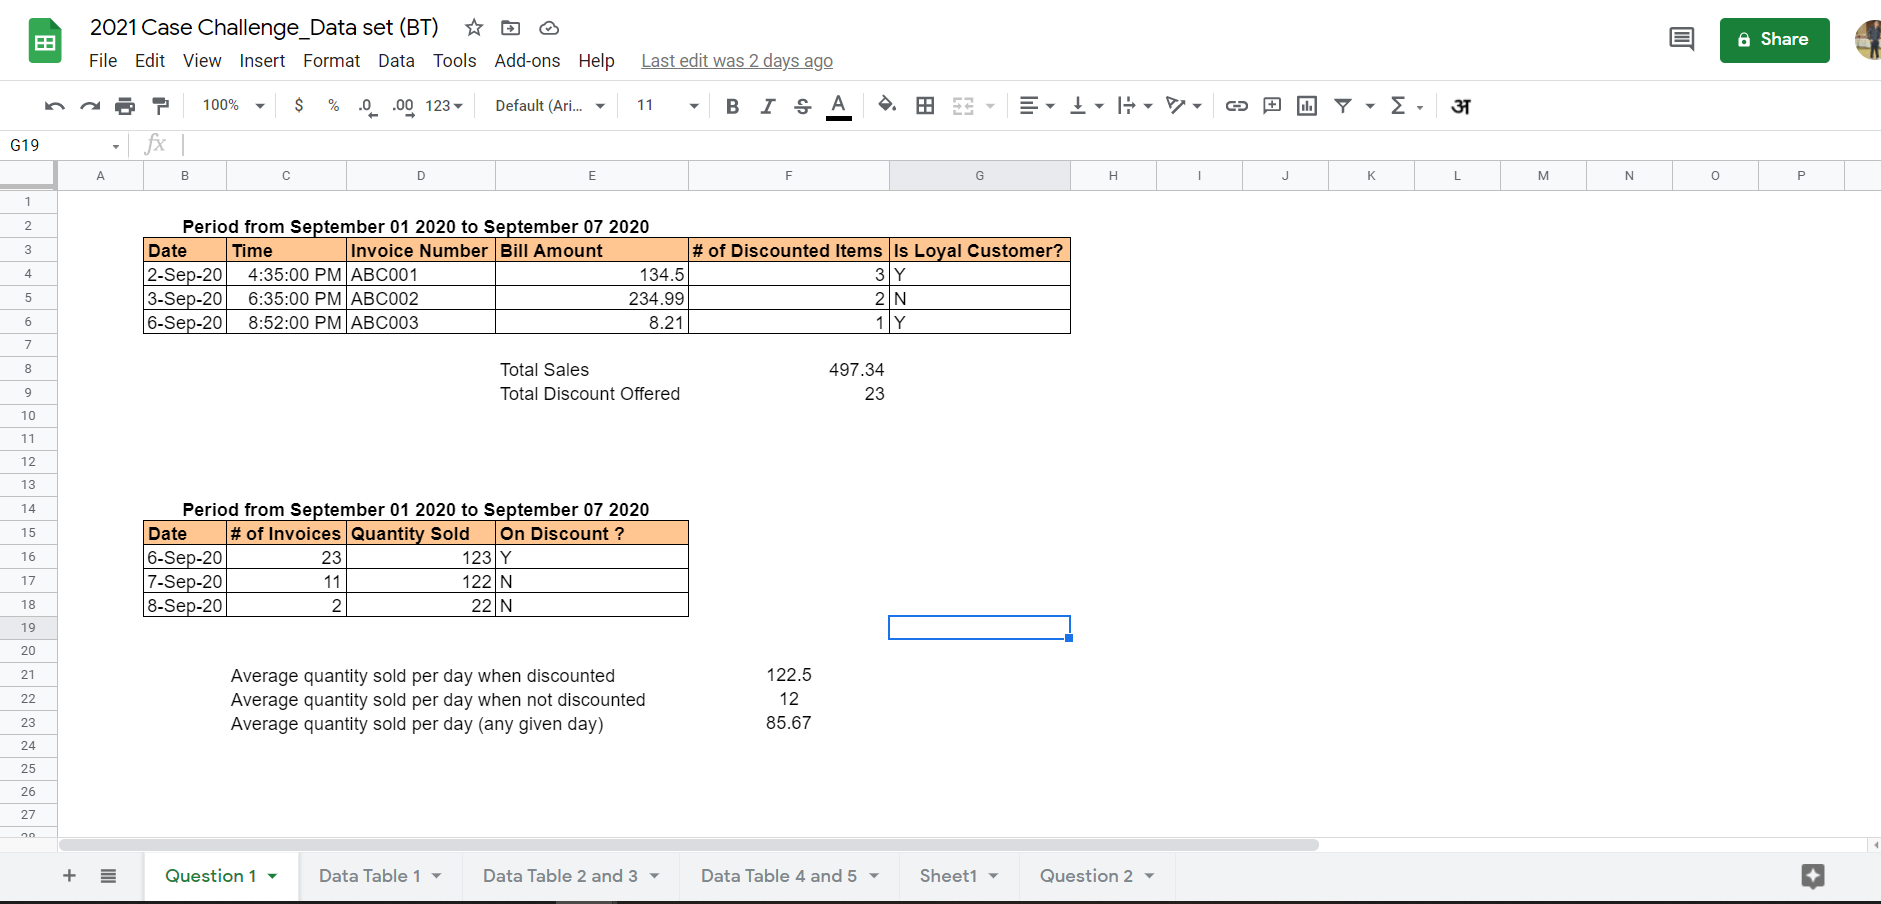

We'll get the above file as a dictionary of dataframes

In [ ]:
df = pd.read_excel('/content/2021 Case Challenge_Data set (BT).xlsx',sheet_name=None)

In [ ]:
type(df)

dict

We Cannot use such a data before preprocessing and extracting a table

In [ ]:
Data_table_1 = df['Data Table 1']
Data_table_1 = Data_table_1[:][4:]
col_names = list(Data_table_1.columns)[:6]
Data_table_1 = Data_table_1.drop(columns=col_names)
Data_table_1 = Data_table_1.reset_index()
Data_table_1 = Data_table_1.drop(columns=['index'])
col_names = np.array(Data_table_1[:][0:1])
col_names = list(col_names[0])
Data_table_1.columns = col_names
Data_table_1 = Data_table_1[1:]
Data_table_1 = Data_table_1.reset_index()
Data_table_1 = Data_table_1.drop(columns=['index'])
x = pd.Series(Data_table_1['Date'].astype(str))
x = x.str.slice(start=0,stop=10)
Data_table_1['Date']=x
Data_table_1.head()
Data_table_1['Is Loyal Customer?'] = Data_table_1['Customer Loyalty Card No.'].isna()
Data_table_1['Is Loyal Customer?'] = Data_table_1['Is Loyal Customer?'].replace([False,True],['Y','N'])
Data_table_1 = Data_table_1.drop(columns=['Customer Loyalty Card No.'])
Data_table_1.head()

,Date,Time,Invoice Number,Is Loyal Customer?
0,2020-09-01,16:33:00,ABC001,Y
1,2020-09-02,17:33:00,ABC002,N
2,2020-09-03,18:33:00,ABC003,N
3,2020-09-04,19:33:00,ABC004,N
4,2020-09-05,20:33:00,ABC005,N


In [ ]:
Data_table_2 = df['Data Table 2 and 3']
Data_table_2 = Data_table_2[:][2:]
Data_table_2 = Data_table_2.reset_index()
Data_table_2 = Data_table_2.drop(columns=['Unnamed: 0','Unnamed: 1','index','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
col_names = np.array(Data_table_2[:][0:1])
col_names = list(col_names[0])
Data_table_2.columns = col_names
Data_table_2 = Data_table_2[1:]
Data_table_2 = Data_table_2.reset_index()
Data_table_2 = Data_table_2.drop(columns=['index'])
Data_table_2.head()

,Invoice Number,Item Number,Item Quantity
0,ABC001,M898,4
1,ABC002,M567,5
2,ABC003,M444,2
3,ABC004,L767,1
4,ABC005,L340,3


In [ ]:
Data_table_3 = df['Data Table 2 and 3']
Data_table_3 = Data_table_3[['Unnamed: 7','Unnamed: 8']]
Data_table_3 = Data_table_3[2:]
Data_table_3 = Data_table_3.reset_index()
Data_table_3 = Data_table_3.drop(columns=['index'])
col_names = np.array(Data_table_3[:][0:1])
col_names = list(col_names[0])
col_names[0] = 'Item Number'
Data_table_3.columns = col_names 
Data_table_3 = Data_table_3[1:10]
Data_table_3 = Data_table_3.reset_index()
Data_table_3 = Data_table_3.drop(columns=['index'])
ind_quant = []
for i in range(len(Data_table_3)):
    #print(i)
    item_quantity = str(Data_table_3['Item Name'][i])
    #idx = item_quantity.index('-') + 2
    item_quantity = int(item_quantity[-6:-2])
    #print(item_quantity)
    ind_quant.append(item_quantity)
Data_table_3['Item Quantity'] = ind_quant
Data_table_3

,Item Number,Item Name,Item Quantity
0,M898,Mango - 1000ml,1000
1,M567,Mango - 500ml,500
2,M444,Mango - 200ml,200
3,L767,Litchi - 1000ml,1000
4,L340,Litchi - 500ml,500
5,L237,Litchi - 200ml,200
6,O567,Orange - 1000ml,1000
7,O345,Orange - 500ml,500
8,O443,Orange - 200ml,200


In [ ]:
Data_table_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Number    9 non-null      object
 1   Item Name      9 non-null      object
 2   Item Quantity  9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [ ]:
Data_table_45 = df['Data Table 4 and 5']
Data_table_45 = Data_table_45[:][3:]
Data_table_45 = Data_table_45.reset_index()
Data_table_45 = Data_table_45.drop(columns=['Unnamed: 0','Unnamed: 4','Unnamed: 5','index'])
Data_table_45.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Date,Item No.,Price Per Unit,Date,Item No.,Discount Percentage
1,2020-09-01 00:00:00,M898,90,2020-09-01 00:00:00,M898,0.12
2,2020-09-02 00:00:00,M898,91,2020-09-03 00:00:00,M898,0.11
3,2020-09-03 00:00:00,M898,89.96,2020-09-06 00:00:00,M898,0.07
4,2020-09-04 00:00:00,M898,100,2020-09-01 00:00:00,L340,1.01


In [ ]:
Data_table_4 = Data_table_45[['Unnamed: 1','Unnamed: 2','Unnamed: 3']]
col_names = np.array(Data_table_4[:][0:1])
col_names = list(col_names[0])
col_names[1]='Item Number'
Data_table_4.columns = col_names
Data_table_4 = Data_table_4[1:]
x = pd.Series(Data_table_4['Date'].astype(str))
x = x.str.slice(start=0,stop=10)
Data_table_4['Date']=x
Data_table_4 = Data_table_4.reset_index()
Data_table_4 = Data_table_4.drop(columns=['index'])
Data_table_4.head()

,Date,Item Number,Price Per Unit
0,2020-09-01,M898,90
1,2020-09-02,M898,91
2,2020-09-03,M898,89.96
3,2020-09-04,M898,100
4,2020-09-05,M898,99


In [ ]:
Data_table_5 = Data_table_45[['Unnamed: 6','Unnamed: 7','Unnamed: 8']]
col_names = np.array(Data_table_5[:][0:1])
col_names = list(col_names[0])
col_names[1]='Item Number'
Data_table_5.columns = col_names
Data_table_5 = Data_table_5[1:]
x = pd.Series(Data_table_5['Date'].astype(str))
x = x.str.slice(start=0,stop=10)
Data_table_5['Date']=x
Data_table_5 = Data_table_5.reset_index()
Data_table_5 = Data_table_5.drop(columns=['index'])
Data_table_5.head()

,Date,Item Number,Discount Percentage
0,2020-09-01,M898,0.12
1,2020-09-03,M898,0.11
2,2020-09-06,M898,0.07
3,2020-09-01,L340,1.01
4,2020-09-02,L340,0.7


In [ ]:
rep_df = Data_table_1
rep_df = rep_df.merge(Data_table_2,how='left',on='Invoice Number',left_index=True,sort=True)
rep_df = rep_df.merge(Data_table_3,how='left',on='Item Number',left_index=True,sort=True)
rep_df = rep_df.merge(Data_table_4,how='left',on=['Date','Item Number'],left_index=True,sort=True)
rep_df = rep_df.merge(Data_table_5,how='left',on=['Date','Item Number'],left_index=True,sort=True)
rep_df['impute_Discount'] = rep_df['Discount Percentage'].isna()
#rep_df['is Discounted'] = rep_df['is Discounted'].replace([False,True],[0,1])
rep_df['impute_price'] = rep_df['Price Per Unit'].isna()
item_classes = [['L',500],['M',1000],['O',200]]
rep_df = rep_df.reset_index()
rep_df = rep_df.drop(columns=['index'])
for i in range(len(rep_df)):
    if rep_df['impute_price'][i]==True:
        Item_Name = rep_df['Item Name'][i]
        itm_class = Item_Name[0]
        if itm_class==item_classes[0][0]:
            price = Data_table_4[Data_table_4['Item Number']=='L340']
            price = price[price['Date']==rep_df['Date'][i]]
            price = price['Price Per Unit']
            if rep_df['Item Quantity_y'][i]==1000:
                price = 2*price
            elif rep_df['Item Quantity_y'][i]==200:
                price = 2*price/5
        elif itm_class==item_classes[1][0]:
            price = Data_table_4[Data_table_4['Item Number']=='M898']
            price = price[price['Date']==rep_df['Date'][i]]
            price = price['Price Per Unit']
            if rep_df['Item Quantity_y'][i]==500:
                price = price/2
            elif rep_df['Item Quantity_y'][i]==200:
                price = price/5
        elif itm_class==item_classes[2][0]:
            price = Data_table_4[Data_table_4['Item Number']=='O443']
            price = price[price['Date']==rep_df['Date'][i]]
            price = price['Price Per Unit']
            if rep_df['Item Quantity_y'][i]==1000:
                price = 5*price
            elif rep_df['Item Quantity_y'][i]==500:
                price = 5*price/2
        price = list(price)
        rep_df['Price Per Unit'][i] = price[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in range(len(rep_df)):
    if rep_df['impute_Discount'][i]==True:
        Item_Name = rep_df['Item Name'][i]
        itm_class = Item_Name[0]
        if itm_class==item_classes[0][0]:
            price = Data_table_5[Data_table_5['Item Number']=='L340']
            price = price[price['Date']==rep_df['Date'][i]]
            price = price['Discount Percentage']
        elif itm_class==item_classes[1][0]:
            price = Data_table_5[Data_table_5['Item Number']=='M898']
            price = price[price['Date']==rep_df['Date'][i]]
            price = price['Discount Percentage']
        elif itm_class==item_classes[2][0]:
            price = Data_table_5[Data_table_5['Item Number']=='O443']
            price = price[price['Date']==rep_df['Date'][i]]
            price = price['Discount Percentage']
        price = list(price)
        #print(itm_class,price)
        if len(price)==0:
            price=[0]
        rep_df['Discount Percentage'][i] = price[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
rep_df.head()

,Date,Time,Invoice Number,Is Loyal Customer?,Item Number,Item Quantity_x,Item Name,Item Quantity_y,Price Per Unit,Discount Percentage,impute_Discount,impute_price
0,2020-09-01,1900-01-01 04:33:00,ABC013,N,L767,1,Litchi - 1000ml,1000,22,1.01,True,True
1,2020-09-01,16:33:00,ABC001,Y,M898,4,Mango - 1000ml,1000,90,0.12,False,False
2,2020-09-01,22:33:00,ABC007,N,O567,1,Orange - 1000ml,1000,55,0,True,True
3,2020-09-02,1900-01-01 05:33:00,ABC014,N,L340,1,Litchi - 500ml,500,10,0.7,False,False
4,2020-09-02,17:33:00,ABC002,N,M567,5,Mango - 500ml,500,45.5,0,True,True


In [ ]:
rep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 18 non-null     object
 1   Time                 18 non-null     object
 2   Invoice Number       18 non-null     object
 3   Is Loyal Customer?   18 non-null     object
 4   Item Number          18 non-null     object
 5   Item Quantity_x      18 non-null     object
 6   Item Name            18 non-null     object
 7   Item Quantity_y      18 non-null     int64 
 8   Price Per Unit       18 non-null     object
 9   Discount Percentage  18 non-null     object
 10  impute_Discount      18 non-null     bool  
 11  impute_price         18 non-null     bool  
dtypes: bool(2), int64(1), object(9)
memory usage: 1.6+ KB


In [ ]:
rep_df['Bill Amount']=rep_df['Price Per Unit']*rep_df['Item Quantity_x']
#rep_df['#Discounted Items'] = rep_df['Item Quantity_x']
rep_df['Actual Value']=rep_df['Bill Amount']/(1-rep_df['Discount Percentage'])
rep_df['Discount Value']=rep_df['Actual Value']-rep_df['Bill Amount']
rep_df['isDiscounted']=rep_df['Discount Percentage']>0

In [ ]:
rep_df.head()

,Date,Time,Invoice Number,Is Loyal Customer?,Item Number,Item Quantity_x,Item Name,Item Quantity_y,Price Per Unit,Discount Percentage,impute_Discount,impute_price,Bill Amount,Actual Value,Discount Value,isDiscounted
0,2020-09-01,1900-01-01 04:33:00,ABC013,N,L767,1,Litchi - 1000ml,1000,22,1.01,True,True,22,-2200,-2222,True
1,2020-09-01,16:33:00,ABC001,Y,M898,4,Mango - 1000ml,1000,90,0.12,False,False,360,409.091,49.0909,True
2,2020-09-01,22:33:00,ABC007,N,O567,1,Orange - 1000ml,1000,55,0,True,True,55,55,0,False
3,2020-09-02,1900-01-01 05:33:00,ABC014,N,L340,1,Litchi - 500ml,500,10,0.7,False,False,10,33.3333,23.3333,True
4,2020-09-02,17:33:00,ABC002,N,M567,5,Mango - 500ml,500,45.5,0,True,True,227.5,227.5,0,False


In [ ]:
num_discounted_items = [0]*len(rep_df)
for i in range(len(num_discounted_items)):
    if rep_df['isDiscounted'][i]==True:
        num_discounted_items[i]=rep_df['Item Quantity_x']
rep_df['#Discounted Items']=num_discounted_items
report_1_df = rep_df[['Date','Time','Invoice Number','#Discounted Items','Is Loyal Customer?']]
Total_sales = sum(rep_df['Bill Amount'])
Total_Discounts_Offered = sum(rep_df['Discount Value'])

In [ ]:
report_1_df

,Date,Time,Invoice Number,#Discounted Items,Is Loyal Customer?
0,2020-09-01,1900-01-01 04:33:00,ABC013,0 1 1 4 2 1 3 1 4 5 5 ...,N
1,2020-09-01,16:33:00,ABC001,0 1 1 4 2 1 3 1 4 5 5 ...,Y
2,2020-09-01,22:33:00,ABC007,0,N
3,2020-09-02,1900-01-01 05:33:00,ABC014,0 1 1 4 2 1 3 1 4 5 5 ...,N
4,2020-09-02,17:33:00,ABC002,0,N
5,2020-09-02,23:33:00,ABC008,0 1 1 4 2 1 3 1 4 5 5 ...,N
6,2020-09-03,1900-01-01 06:33:00,ABC015,0 1 1 4 2 1 3 1 4 5 5 ...,Y
7,2020-09-03,18:33:00,ABC003,0 1 1 4 2 1 3 1 4 5 5 ...,N
8,2020-09-03,1900-01-01 00:33:00,ABC009,0 1 1 4 2 1 3 1 4 5 5 ...,N
9,2020-09-04,19:33:00,ABC004,0 1 1 4 2 1 3 1 4 5 5 ...,N


In [ ]:
dates = list(rep_df['Date'].unique())
invoices = []
Quantity_Sold = []
On_Discount = []
for date in dates:
    datewise_df = rep_df[rep_df['Date']==date]
    num_invoices = len(datewise_df)
    invoices.append(num_invoices)
    Quantity = sum(datewise_df['Item Quantity_x'])
    Quantity_Sold.append(Quantity)
    discount = list(datewise_df['isDiscounted']==True)
    disc = 'N'
    if len(discount)>0:
        disc= 'Y'
    On_Discount.append(disc)


report_2_df = pd.DataFrame()
columns=['Date','# of Invoices','Quantity Sold','On Discount']
report_2_df['Date']=dates
report_2_df['# of Invoices']=invoices
report_2_df['Quantity Sold']=Quantity_Sold
report_2_df['On Discount?']=On_Discount
report_2_df

,Date,# of Invoices,Quantity Sold,On Discount?
0,2020-09-01,3,6,Y
1,2020-09-02,3,7,Y
2,2020-09-03,3,5,Y
3,2020-09-04,3,5,Y
4,2020-09-05,3,7,Y
5,2020-09-06,3,4,Y


In [ ]:
disc_df = rep_df[rep_df['isDiscounted']==True]
avg_sales_discount = sum(disc_df['Item Quantity_x'])/len(disc_df)
non_disc_df = rep_df[rep_df['isDiscounted']==False]
avg_sales_no_discount = sum(non_disc_df['Item Quantity_x'])/len(non_disc_df)
avg_sales = sum(rep_df['Item Quantity_x'])/len(rep_df)
#disc_df